In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import os

In [2]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:

!unzip "/content/cats_and_dogs_filtered" -d "/content/catsvsdogs"


unzip:  cannot find or open /content/cats_and_dogs_filtered, /content/cats_and_dogs_filtered.zip or /content/cats_and_dogs_filtered.ZIP.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip /content/drive/MyDrive/cats_and_dogs_filtered.zip 

Archive:  /content/drive/MyDrive/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/va

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
base_dir = os.path.join(os.path.dirname('/content/cats_and_dogs_filtered'), 'dataset')
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [9]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [11]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [12]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.518.jpg', 'cat.497.jpg', 'cat.667.jpg', 'cat.327.jpg', 'cat.917.jpg', 'cat.383.jpg', 'cat.359.jpg', 'cat.36.jpg', 'cat.877.jpg', 'cat.138.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


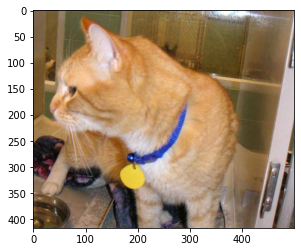

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

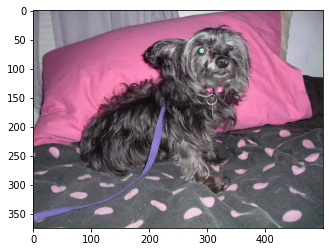

In [14]:
plt.imshow(mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[0])))

image dimensions: (403, 499)


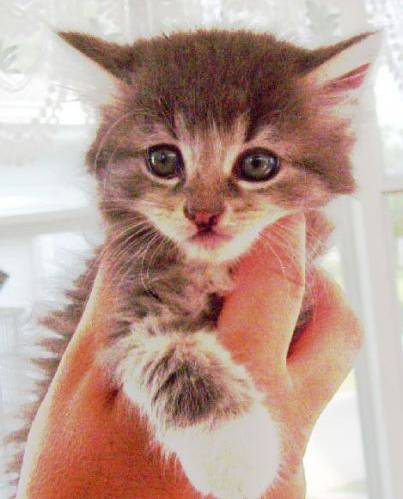

In [15]:
cats_image_path = '/content/cats_and_dogs_filtered/train/cats/cat.100.jpg'
cats_image = Image.open(cats_image_path)
print("image dimensions:",cats_image.size)
cats_image

In [16]:
import numpy as np

image=np.array(train_dog_fnames[0]) 
print(image.shape)

()


In [17]:
import tensorflow as tf
import numpy as np
import pathlib
import datetime

In [18]:
AlexNet = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(2, activation='softmax')
])
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

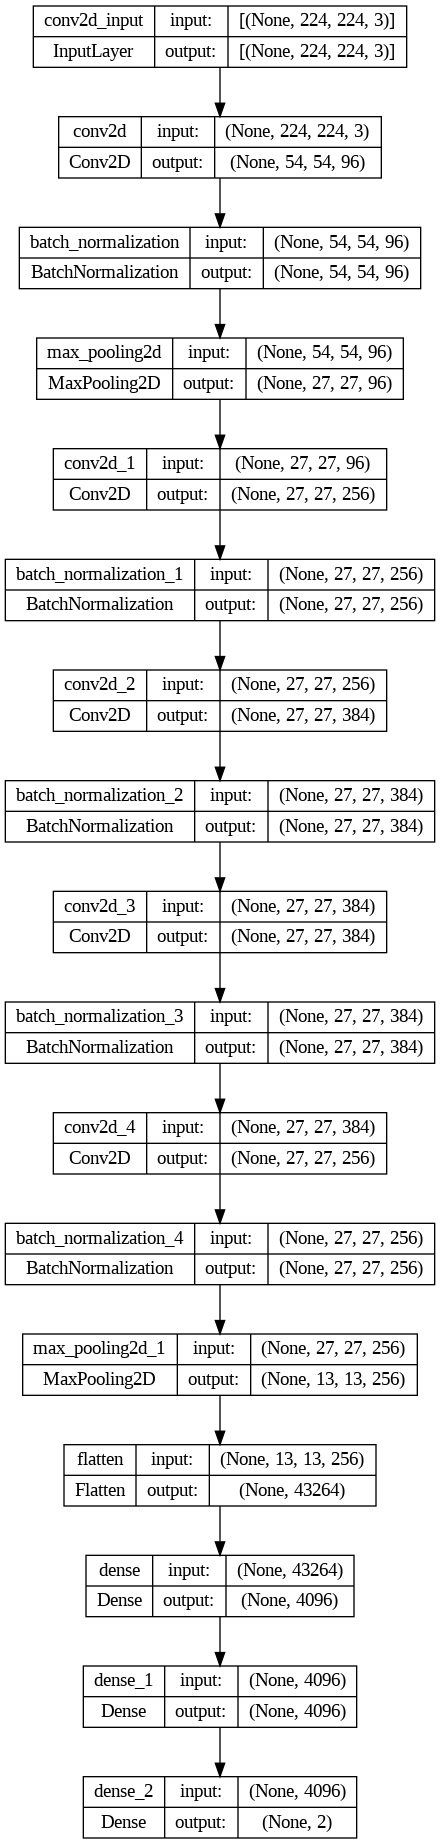

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(AlexNet,  show_shapes=True, show_layer_names=True)

In [20]:
AlexNet.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])


In [21]:
from keras.callbacks import ModelCheckpoint
weightpath = "best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

In [23]:
train_num = train_generator.samples
valid_num = validation_generator.samples
batch_size=120


In [24]:
history = AlexNet.fit_generator(train_generator,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=validation_generator,
                         epochs=25,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)

<ipython-input-24-731e636ac145>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = AlexNet.fit_generator(train_generator,


Epoch 1/25
16/16 [==============================] - ETA: 0s - loss: 3.3994 - accuracy: 0.5250

16/16 [==============================] - 15s 182ms/step - loss: 3.3994 - accuracy: 0.5250 - val_loss: 2.2704 - val_accuracy: 0.4938
Epoch 2/25
16/16 [==============================] - ETA: 0s - loss: 1.1566 - accuracy: 0.5875

16/16 [==============================] - 3s 173ms/step - loss: 1.1566 - accuracy: 0.5875 - val_loss: 0.7059 - val_accuracy: 0.5063
Epoch 3/25
16/16 [==============================] - ETA: 0s - loss: 0.8256 - accuracy: 0.5656

16/16 [==============================] - 3s 199ms/step - loss: 0.8256 - accuracy: 0.5656 - val_loss: 0.8919 - val_accuracy: 0.5188
Epoch 4/25
16/16 [==============================] - ETA: 0s - loss: 0.8298 - accuracy: 0.6219

16/16 [==============================] - 3s 198ms/step - loss: 0.8298 - accuracy: 0.6219 - val_loss: 0.7338 - val_accuracy: 0.4688
Epoch 5/25
16/16 [==============================] - ETA: 0s - loss: 0.6710 - accuracy: 0.6781

16/16 [==============================] - 4s 234ms/step - loss: 0.6710 - accuracy: 0.6781 - val_loss: 0.7023 - val_accuracy: 0.5375
Epoch 6/25
16/16 [==============================] - ETA: 0s - loss: 0.5886 - accuracy: 0.6781

16/16 [==============================] - 3s 155ms/step - loss: 0.5886 - accuracy: 0.6781 - val_loss: 0.7450 - val_accuracy: 0.4875
Epoch 7/25
16/16 [==============================] - ETA: 0s - loss: 0.6214 - accuracy: 0.7125

16/16 [==============================] - 3s 157ms/step - loss: 0.6214 - accuracy: 0.7125 - val_loss: 0.7324 - val_accuracy: 0.5750
Epoch 8/25
16/16 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.7969

16/16 [==============================] - 3s 196ms/step - loss: 0.4614 - accuracy: 0.7969 - val_loss: 0.6418 - val_accuracy: 0.6250
Epoch 9/25
16/16 [==============================] - ETA: 0s - loss: 0.4929 - accuracy: 0.7812

16/16 [==============================] - 3s 170ms/step - loss: 0.4929 - accuracy: 0.7812 - val_loss: 0.7214 - val_accuracy: 0.5562
Epoch 10/25
16/16 [==============================] - ETA: 0s - loss: 0.4165 - accuracy: 0.7844

16/16 [==============================] - 3s 157ms/step - loss: 0.4165 - accuracy: 0.7844 - val_loss: 0.7210 - val_accuracy: 0.5875
Epoch 11/25
16/16 [==============================] - ETA: 0s - loss: 0.4398 - accuracy: 0.7781

16/16 [==============================] - 2s 152ms/step - loss: 0.4398 - accuracy: 0.7781 - val_loss: 0.6842 - val_accuracy: 0.5750
Epoch 12/25
16/16 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8219

16/16 [==============================] - 2s 155ms/step - loss: 0.4241 - accuracy: 0.8219 - val_loss: 0.8273 - val_accuracy: 0.5312
Epoch 13/25
16/16 [==============================] - ETA: 0s - loss: 0.4391 - accuracy: 0.8031

16/16 [==============================] - 3s 201ms/step - loss: 0.4391 - accuracy: 0.8031 - val_loss: 0.7414 - val_accuracy: 0.5688
Epoch 14/25
16/16 [==============================] - ETA: 0s - loss: 0.3344 - accuracy: 0.8656

16/16 [==============================] - 3s 179ms/step - loss: 0.3344 - accuracy: 0.8656 - val_loss: 0.7255 - val_accuracy: 0.5437
Epoch 15/25
16/16 [==============================] - ETA: 0s - loss: 0.3563 - accuracy: 0.8406

16/16 [==============================] - 3s 215ms/step - loss: 0.3563 - accuracy: 0.8406 - val_loss: 0.7254 - val_accuracy: 0.6062
Epoch 16/25
16/16 [==============================] - ETA: 0s - loss: 0.2982 - accuracy: 0.8906

16/16 [==============================] - 3s 155ms/step - loss: 0.2982 - accuracy: 0.8906 - val_loss: 0.6597 - val_accuracy: 0.6438
Epoch 17/25
16/16 [==============================] - ETA: 0s - loss: 0.2842 - accuracy: 0.8875

16/16 [==============================] - 3s 191ms/step - loss: 0.2842 - accuracy: 0.8875 - val_loss: 0.7918 - val_accuracy: 0.6187
Epoch 18/25
16/16 [==============================] - ETA: 0s - loss: 0.2246 - accuracy: 0.9375

16/16 [==============================] - 3s 155ms/step - loss: 0.2246 - accuracy: 0.9375 - val_loss: 0.7239 - val_accuracy: 0.5875
Epoch 19/25
16/16 [==============================] - ETA: 0s - loss: 0.2313 - accuracy: 0.9125

16/16 [==============================] - 2s 153ms/step - loss: 0.2313 - accuracy: 0.9125 - val_loss: 0.8267 - val_accuracy: 0.5750
Epoch 20/25
16/16 [==============================] - ETA: 0s - loss: 0.2421 - accuracy: 0.9094

16/16 [==============================] - 2s 154ms/step - loss: 0.2421 - accuracy: 0.9094 - val_loss: 0.7278 - val_accuracy: 0.6000
Epoch 21/25
16/16 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9250

16/16 [==============================] - 3s 198ms/step - loss: 0.2156 - accuracy: 0.9250 - val_loss: 0.7620 - val_accuracy: 0.5875
Epoch 22/25
16/16 [==============================] - ETA: 0s - loss: 0.1913 - accuracy: 0.9344

16/16 [==============================] - 3s 156ms/step - loss: 0.1913 - accuracy: 0.9344 - val_loss: 0.7970 - val_accuracy: 0.5500
Epoch 23/25
16/16 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9469

16/16 [==============================] - 2s 154ms/step - loss: 0.1471 - accuracy: 0.9469 - val_loss: 0.7437 - val_accuracy: 0.6375
Epoch 24/25
16/16 [==============================] - ETA: 0s - loss: 0.1487 - accuracy: 0.9500

16/16 [==============================] - 2s 155ms/step - loss: 0.1487 - accuracy: 0.9500 - val_loss: 0.7933 - val_accuracy: 0.6313
Epoch 25/25
16/16 [==============================] - ETA: 0s - loss: 0.1875 - accuracy: 0.9375

16/16 [==============================] - 3s 198ms/step - loss: 0.1875 - accuracy: 0.9375 - val_loss: 0.8081 - val_accuracy: 0.5688


In [25]:
AlexNet.evaluate(validation_generator)

50/50 [==============================] - 4s 76ms/step - loss: 0.8070 - accuracy: 0.6030


[0.8069629073143005, 0.6029999852180481]

Q2. Train, test and report the performances using the following models on the Cats_and_Dogs_Dataset and Horse2Zebra dataset.

In [27]:
from keras.applications.vgg16 import VGG16
VGG= VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
VGG.trainable = False #freeze the layers
VGG.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [46]:
import tensorflow as tf
vggmodel = tf.keras.Sequential([
    VGG,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6000, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
vggmodel.summary()

vggmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 6000)              150534000 
                                                                 
 dense_4 (Dense)             (None, 2)                 12002     
                                                                 
Total params: 165,260,690
Trainable params: 150,546,002
Non-trainable params: 14,714,688
_________________________________________________________________


In [48]:
vgghistory = vggmodel.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 20s 196ms/step - loss: 0.5422 - acc: 0.8410 - val_loss: 0.3325 - val_acc: 0.8590
Epoch 2/20
100/100 [==============================] - 19s 191ms/step - loss: 0.1229 - acc: 0.9555 - val_loss: 0.2243 - val_acc: 0.9090
Epoch 3/20
100/100 [==============================] - 24s 245ms/step - loss: 0.0519 - acc: 0.9875 - val_loss: 0.2171 - val_acc: 0.9130
Epoch 4/20
100/100 [==============================] - 21s 207ms/step - loss: 0.0263 - acc: 0.9970 - val_loss: 0.2194 - val_acc: 0.9160
Epoch 5/20
100/100 [==============================] - 20s 202ms/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.2335 - val_acc: 0.9140
Epoch 6/20
100/100 [==============================] - 20s 198ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.2547 - val_acc: 0.9100
Epoch 7/20
100/100 [==============================] - 24s 244ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.2532 - val_acc: 0.9170
Epoch 8/20
100/100 [==============================] - 2

In [50]:
vggmodel.evaluate(validation_generator)

50/50 [==============================] - 8s 155ms/step - loss: 0.3189 - acc: 0.9100


[0.3189457654953003, 0.9100000262260437]

In [36]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
for layer in inception.layers:
    layer.trainable = False
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_475 (Conv2D)            (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_475 (Batch  (None, 111, 111, 32  96         ['conv2d_475[0][0]']             
 Normalization)                 )                                                      

In [65]:
add_model = tf.keras.Sequential()
add_model.add(inception)
add_model.add(tf.keras.layers.GlobalAveragePooling2D())
add_model.add(tf.keras.layers.Dropout(0.5))
add_model.add(tf.keras.layers.Dense(60000,activation='relu'))
add_model.add(tf.keras.layers.Dense(2,activation='softmax'))
add_model.summary()
add_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 60000)             122940000 
                                                                 
 dense_16 (Dense)            (None, 2)                 120002    
                                                                 
Total params: 144,862,786
Trainable params: 123,060,002
Non-trainable params: 21,802,784
______________________________

In [66]:
inceptionhistory = add_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 21s 153ms/step - loss: 0.6930 - acc: 0.5225 - val_loss: 0.6926 - val_acc: 0.9380
Epoch 2/20
100/100 [==============================] - 14s 138ms/step - loss: 0.6837 - acc: 0.8500 - val_loss: 0.6635 - val_acc: 0.9860
Epoch 3/20
100/100 [==============================] - 14s 138ms/step - loss: 0.6490 - acc: 0.9775 - val_loss: 0.6341 - val_acc: 0.9880
Epoch 4/20
100/100 [==============================] - 14s 139ms/step - loss: 0.6231 - acc: 0.9835 - val_loss: 0.6109 - val_acc: 0.9850
Epoch 5/20
100/100 [==============================] - 15s 151ms/step - loss: 0.6019 - acc: 0.9845 - val_loss: 0.5927 - val_acc: 0.9870
Epoch 6/20
100/100 [==============================] - 14s 141ms/step - loss: 0.5863 - acc: 0.9885 - val_loss: 0.5799 - val_acc: 0.9840
Epoch 7/20
100/100 [==============================] - 14s 139ms/step - loss: 0.5745 - acc: 0.9880 - val_loss: 0.5689 - val_acc: 0.9880
Epoch 8/20
100/100 [==============================] - 1

In [68]:
add_model.evaluate(validation_generator)

50/50 [==============================] - 5s 106ms/step - loss: 0.4645 - acc: 0.9880


[0.4645164906978607, 0.9879999756813049]

In [57]:
import tensorflow as tf
inceptionmodel = tf.keras.Sequential(inception)
inceptionmodel.add(tf.keras.layers.Flatten())
inceptionmodel.add(tf.keras.layers.Dense(4000, activation='relu'))
inceptionmodel.add(tf.keras.layers.Dense(2, activation='softmax'))
inceptionmodel.summary()

inceptionmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_10 (Dense)            (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [58]:
inceptionhistory = inceptionmodel.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 21s 154ms/step - loss: 0.1225 - acc: 0.9490 - val_loss: 0.0665 - val_acc: 0.9820
Epoch 2/20
100/100 [==============================] - 14s 135ms/step - loss: 0.0132 - acc: 0.9945 - val_loss: 0.0465 - val_acc: 0.9860
Epoch 3/20
100/100 [==============================] - 14s 136ms/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.0461 - val_acc: 0.9850
Epoch 4/20
100/100 [==============================] - 14s 137ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0448 - val_acc: 0.9870
Epoch 5/20
100/100 [==============================] - 14s 141ms/step - loss: 8.8185e-04 - acc: 1.0000 - val_loss: 0.0447 - val_acc: 0.9870
Epoch 6/20
100/100 [==============================] - 14s 135ms/step - loss: 6.4445e-04 - acc: 1.0000 - val_loss: 0.0445 - val_acc: 0.9870
Epoch 7/20
100/100 [==============================] - 18s 185ms/step - loss: 5.2677e-04 - acc: 1.0000 - val_loss: 0.0450 - val_acc: 0.9840
Epoch 8/20
100/100 [=======================

In [70]:
inceptionmodel.evaluate(validation_generator)

50/50 [==============================] - 5s 105ms/step - loss: 0.0467 - acc: 0.9860


[0.04674068093299866, 0.9860000014305115]

In [34]:
from tensorflow.keras.applications import ResNet50
ResNet50 = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")
for layer in ResNet50.layers:
    layer.trainable = False
ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [81]:
resnetmodel = tf.keras.Sequential()
resnetmodel.add(ResNet50)
resnetmodel.add(tf.keras.layers.GlobalAveragePooling2D())
resnetmodel.add(tf.keras.layers.Flatten())
resnetmodel.add(tf.keras.layers.Dropout(0.5))
resnetmodel.add(tf.keras.layers.Dense(6000,activation='relu'))
resnetmodel.add(tf.keras.layers.Dense(2,activation='softmax'))
resnetmodel.summary()
resnetmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 dense_34 (Dense)            (None, 6000)              12294000  
                                                                 
 dense_35 (Dense)            (None, 2)                 12002     
                                                     

In [82]:
resnetmodel.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 21s 156ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 14s 143ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/20
100/100 [==============================] - 15s 146ms/step - loss: 0.6931 - acc: 0.5170 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/20
100/100 [==============================] - 14s 144ms/step - loss: 0.6930 - acc: 0.5110 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 5/20
100/100 [==============================] - 14s 144ms/step - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 6/20
100/100 [==============================] - 14s 145ms/step - loss: 0.6929 - acc: 0.5325 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 7/20
100/100 [==============================] - 14s 145ms/step - loss: 0.6928 - acc: 0.5440 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 8/20
100/100 [==============================] - 1

In [38]:
!pip install -U efficientnet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.5 MB/s eta 0:00:00


In [41]:
import efficientnet.keras as efn
efficient50 = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
for layer in efficient50.layers:
    layer.trainable = False
efficient50.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                   

In [83]:
efficient50_model = tf.keras.Sequential()
efficient50_model.add(efficient50)
efficient50_model.add(tf.keras.layers.GlobalAveragePooling2D())
efficient50_model.add(tf.keras.layers.Flatten())
efficient50_model.add(tf.keras.layers.Dropout(0.5))
efficient50_model.add(tf.keras.layers.Dense(6000,activation='relu'))
efficient50_model.add(tf.keras.layers.Dense(2,activation='softmax'))
efficient50_model.summary()
efficient50_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d_8   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_14 (Flatten)        (None, 1280)              0         
                                                                 
 dropout_10 (Dropout)        (None, 1280)              0         
                                                                 
 dense_36 (Dense)            (None, 6000)              7686000   
                                                                 
 dense_37 (Dense)            (None, 2)               

In [84]:
efficient50_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 24s 159ms/step - loss: 0.6917 - acc: 0.7295 - val_loss: 0.6892 - val_acc: 0.9210
Epoch 2/20
100/100 [==============================] - 13s 127ms/step - loss: 0.6837 - acc: 0.9360 - val_loss: 0.6750 - val_acc: 0.9550
Epoch 3/20
100/100 [==============================] - 13s 131ms/step - loss: 0.6636 - acc: 0.9500 - val_loss: 0.6481 - val_acc: 0.9660
Epoch 4/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6359 - acc: 0.9570 - val_loss: 0.6194 - val_acc: 0.9720
Epoch 5/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6094 - acc: 0.9665 - val_loss: 0.5942 - val_acc: 0.9800
Epoch 6/20
100/100 [==============================] - 13s 129ms/step - loss: 0.5862 - acc: 0.9625 - val_loss: 0.5704 - val_acc: 0.9790
Epoch 7/20
100/100 [==============================] - 13s 131ms/step - loss: 0.5638 - acc: 0.9675 - val_loss: 0.5499 - val_acc: 0.9780
Epoch 8/20
100/100 [==============================] - 1

In [85]:
efficient50_model.evaluate(validation_generator)

50/50 [==============================] - 4s 80ms/step - loss: 0.4269 - acc: 0.9770


[0.42687541246414185, 0.9769999980926514]

In [45]:
from tensorflow.keras.applications import MobileNetV2
Mobil=MobileNetV2( weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in Mobil.layers:
    layer.trainable = False
Mobil.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [86]:
Mobil_model = tf.keras.Sequential()
Mobil_model.add(Mobil)
Mobil_model.add(tf.keras.layers.GlobalAveragePooling2D())
Mobil_model.add(tf.keras.layers.Flatten())
Mobil_model.add(tf.keras.layers.Dropout(0.5))
Mobil_model.add(tf.keras.layers.Dense(6000,activation='relu'))
Mobil_model.add(tf.keras.layers.Dense(2,activation='softmax'))
Mobil_model.summary()
Mobil_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_9   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_15 (Flatten)        (None, 1280)              0         
                                                                 
 dropout_11 (Dropout)        (None, 1280)              0         
                                                                 
 dense_38 (Dense)            (None, 6000)              7686000   
                                                                 
 dense_39 (Dense)            (None, 2)               

In [88]:
Mobil_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 16s 128ms/step - loss: 0.6894 - acc: 0.8780 - val_loss: 0.6813 - val_acc: 0.9780
Epoch 2/20
100/100 [==============================] - 12s 121ms/step - loss: 0.6652 - acc: 0.9685 - val_loss: 0.6480 - val_acc: 0.9790
Epoch 3/20
100/100 [==============================] - 12s 120ms/step - loss: 0.6355 - acc: 0.9715 - val_loss: 0.6214 - val_acc: 0.9800
Epoch 4/20
100/100 [==============================] - 12s 119ms/step - loss: 0.6112 - acc: 0.9745 - val_loss: 0.5980 - val_acc: 0.9800
Epoch 5/20
100/100 [==============================] - 13s 128ms/step - loss: 0.5904 - acc: 0.9710 - val_loss: 0.5795 - val_acc: 0.9800
Epoch 6/20
100/100 [==============================] - 12s 121ms/step - loss: 0.5744 - acc: 0.9740 - val_loss: 0.5656 - val_acc: 0.9790
Epoch 7/20
100/100 [==============================] - 12s 123ms/step - loss: 0.5612 - acc: 0.9760 - val_loss: 0.5538 - val_acc: 0.9810
Epoch 8/20
100/100 [==============================] - 1

In [89]:
Mobil_model.evaluate(validation_generator)

50/50 [==============================] - 4s 75ms/step - loss: 0.4515 - acc: 0.9830


[0.4515397846698761, 0.9829999804496765]